<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [33]:
class Quad_:
    def __init__(self, func, N, a, b):
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N

    def midpoint(self):
        mid = (self.a + self.b) / 2
        return (self.b - self.a) * self.func(mid)
    
    def trapezoidal(self):
        fa = self.func(self.a)
        fb = self.func(self.b)
        return (self.b - self.a) * (fa + fb) / 2
    
    def simpsons(self):
        mid = (self.a + self.b) / 2
        fa = self.func(self.a)
        fm = self.func(mid)
        fb = self.func(self.b)
        return (self.b - self.a) * (fa + 4 * fm + fb) / 6

    

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [34]:
# Add the following to the class in part A). 
class Quad_:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def midpoint(self, f):
        mid = (self.a + self.b) / 2
        return (self.b - self.a) * f(mid)

    def trapezoidal(self, f):
        fa = f(self.a)
        fb = f(self.b)
        return (self.b - self.a) * (fa + fb) / 2

    def simpsons(self, f):
        mid = (self.a + self.b) / 2
        fa = f(self.a)
        fm = f(mid)
        fb = f(self.b)
        return (self.b - self.a) * (fa + 4 * fm + fb) / 6





<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

We perform a change of variables:

$$ x = \frac{(b - a)}{2} t + \frac{(a + b)}{2} $$

where  t  is the new variable that ranges from -1 to 1. The differential dx changes accordingly:

$$ dx = \frac{(b - a)}{2} dt $$

The integral now transforms into:

$$ \int_{a}^{b} f(x) \, dx = \frac{(b - a)}{2} \int_{-1}^{1} f\left(\frac{(b - a)}{2} t + \frac{(a + b)}{2}\right) dt $$

Gauss-Legendre quadrature approximates this integral as:

$$ \int_{-1}^{1} f(t) \, dt \approx \sum_{i=1}^{N} w_i \cdot f(t_i) $$

where $$ w_i $$ are the weights and $$ t_i $$are the nodes (the specific points in the interval$$[-1, 1]$$ for the Gauss-Legendre quadrature.

Substituting the change of variables, the approximation becomes:

$$ \frac{(b - a)}{2} \sum_{i=1}^{N} w_i \cdot f\left(\frac{(b - a)}{2} t_i + \frac{(a + b)}{2}\right) $$




'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

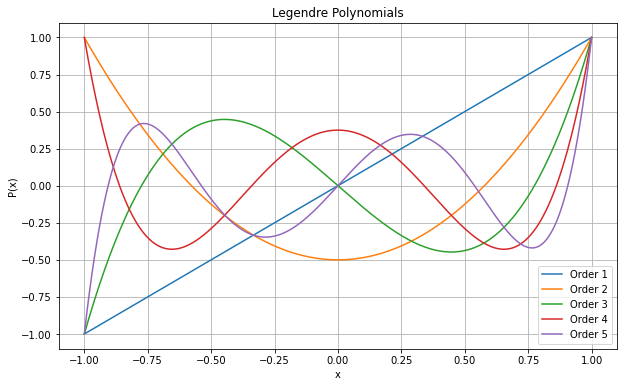

In [35]:
from numpy.polynomial.legendre import Legendre
import matplotlib.pyplot as plt

class Gauss_Quad_(Quad_):
    def __init__(self, a, b, order):
        super().__init__(a, b)
        self.order = order

    def legendre_poly(self):
        # Coefficients for the Legendre polynomial of degree `self.order`
        # The coefficients are for the normalized form which is 1 at x=1
        coeffs = [0] * self.order + [1]
        return Legendre(coeffs)

# Plot the Legendre polynomials for M=[1,2,3,4,5]
x = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))
for M in [1, 2, 3, 4, 5]:
    gauss_quad = Gauss_Quad_(a=-1, b=1, order=M)
    leg_poly = gauss_quad.legendre_poly()
    plt.plot(x, leg_poly(x), label=f'Order {M}')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Legendre Polynomials')
plt.legend()
plt.grid(True)
plt.show()




<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [39]:
# Add the following to the class in part D). 
class Gauss_Quad_(Quad_):
    def __init__(self, a, b, order):
        super().__init__(a, b)
        self.order = order

    def legendre_poly(self):
        # The Legendre polynomial is defined by the recurrence relation
        # (n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
        # Start with P_0(x) = 1 and P_1(x) = x
        if self.order == 0:
            return np.poly1d([1])
        elif self.order == 1:
            return np.poly1d([1, 0])
        else:
            Pn_1 = np.poly1d([1, 0])
            Pn = np.poly1d([1])
            for n in range(2, self.order + 1):
                Pn_1, Pn = Pn, ((2 * n - 1) * np.poly1d([1, 0]) * Pn - (n - 1) * Pn_1) / n
            return Pn

# Creating a child class that will use Newton's method to find the roots of the Legendre polynomial
class Gauss_Quad_Newton(Gauss_Quad_):
    def find_roots(self, tol=1e-10, max_iter=100):
        # Initial guesses for the roots are the roots of the Chebyshev polynomial
        roots = np.cos(np.pi * (np.arange(1, 2 * self.order, 2)) / (2 * self.order))
        Pn = self.legendre_poly()
        for _ in range(max_iter):
            Pn_val = np.polyval(Pn, roots)
            Pn_deriv = np.polyder(Pn)
            Pn_deriv_val = np.polyval(Pn_deriv, roots)
            roots_next = roots - Pn_val / Pn_deriv_val
            if np.max(np.abs(roots_next - roots)) < tol:
                break
            roots = roots_next
        return roots

    def compute_weights(self, roots):
        Pn_deriv = np.polyder(self.legendre_poly())
        Pn_deriv_val = np.polyval(Pn_deriv, roots)
        weights = 2 / ((1 - roots**2) * Pn_deriv_val**2)
        return weights

    def get_positions_weights(self):
        roots = self.find_roots()
        weights = self.compute_weights(roots)
        return roots, weights

file_path = 'gauss_legendre_roots_weights.txt'
with open(file_path, 'w') as file:
    for M in [1, 2, 3, 4, 5]:
        gauss_quad = Gauss_Quad_Newton(a=-1, b=1, order=M)
        roots, weights = gauss_quad.get_positions_weights()
        file.write(f"Order {M}:\n")
        file.write("Roots: " + ', '.join(f"{root:.6f}" for root in roots) + "\n")
        file.write("Weights: " + ', '.join(f"{weight:.6f}" for weight in weights) + "\n\n")






gauss_legendre_roots_weights.txt


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [40]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre

class Gauss_Quad_Scipy(Gauss_Quad_):
    def scipy_method_roots(self):
        """Calculate the roots and weights using the scipy method."""
        roots, weights = roots_legendre(self.order)
        return roots, weights

for M in [1, 2, 3, 4, 5]:
    gauss_quad_scipy = Gauss_Quad_Scipy(a=-1, b=1, order=M)
    roots, weights = gauss_quad_scipy.scipy_method_roots()
    print(f"Order {M}:")
    print("Roots:", roots)
    print("Weights:", weights)
    print("")  # Newline for better readability




Order 1:
Roots: [0.]
Weights: [2.]

Order 2:
Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]

Order 3:
Roots: [-0.77459667  0.          0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

Order 4:
Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

Order 5:
Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]



## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [41]:

class Gauss_Quad_Scipy(Gauss_Quad_):
    def __init__(self, a, b, order):
        super().__init__(a, b, order)
        self.roots, self.weights = roots_legendre(self.order)
    
    def gauss_quad(self, func):
        """Calculate the Gauss-Legendre Quadrature of a function 'func'."""
        # Transform the roots to the interval [a, b]
        transformed_roots = self.a + (self.roots + 1) * (self.b - self.a) / 2
        # Compute the integral
        integral = 0
        for i in range(self.order):
            integral += self.weights[i] * func(transformed_roots[i])
        integral *= (self.b - self.a) / 2
        return integral

# Example usage:
# Define a function to integrate
def f(x):
    return x**2

# Create an instance of the Gauss_Quad_Scipy class with order 5
gauss_quad_scipy = Gauss_Quad_Scipy(a=0, b=1, order=5)

# Calculate the Gauss-Legendre Quadrature of the function f over the interval [0, 1]
integral = gauss_quad_scipy.gauss_quad(f)
integral



0.33333333333333326

## H) Polynomial





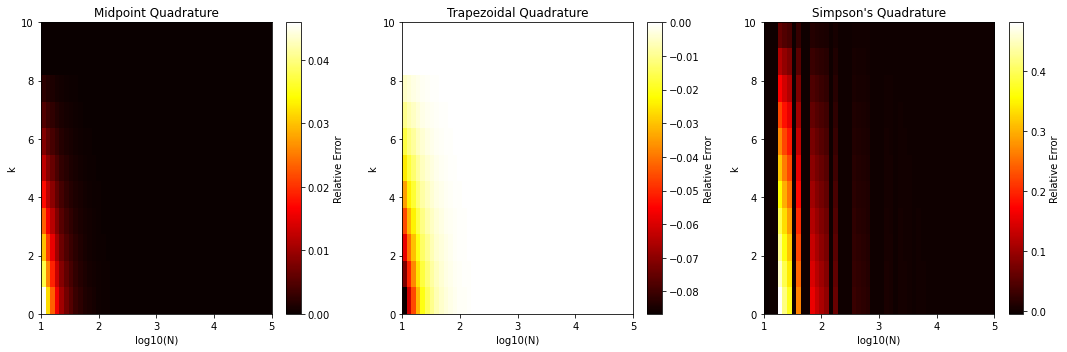

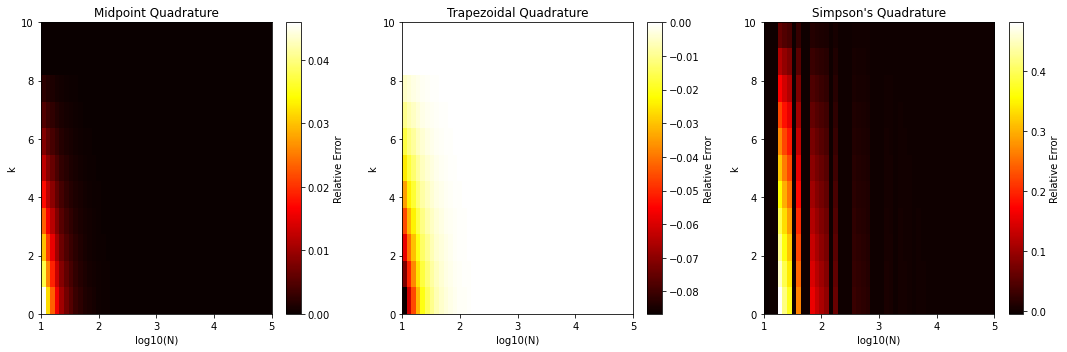

'--------------------Write your code above this line------------------------------'

In [12]:


'''--------------------Write your code below this line------------------------------'''

# Redefine the relative_error function
def relative_error(I_true, I_approx):
    return 2 * (I_true - I_approx) / (I_true + I_approx)

# Recalculate the relative errors for the polynomial function using the previously defined Quad_ class
errors_mid = np.zeros((len(k_values), len(N_values)))
errors_trapz = np.zeros_like(errors_mid)
errors_simpson = np.zeros_like(errors_mid)

for i, k in enumerate(k_values):
    I_true = poly_integral_true(a, b, k)
    for j, N in enumerate(N_values):
        quad = Quad_(a, b)
        # Midpoint Quadrature
        mid_quad_val = quad.midpoint(lambda x: poly_function(x, k), N)
        errors_mid[i, j] = relative_error(I_true, mid_quad_val)

        # Trapezoidal Quadrature
        trapz_quad_val = quad.trapezoidal(lambda x: poly_function(x, k), N)
        errors_trapz[i, j] = relative_error(I_true, trapz_quad_val)

        # Simpson's Quadrature
        simpson_quad_val = quad.simpsons(lambda x: poly_function(x, k), N)
        errors_simpson[i, j] = relative_error(I_true, simpson_quad_val)

# Plotting the heatmaps
plt.figure(figsize=(15, 5))

# Midpoint Quadrature Heatmap
plt.subplot(1, 3, 1)
plt.imshow(errors_mid, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Trapezoidal Quadrature Heatmap
plt.subplot(1, 3, 2)
plt.imshow(errors_trapz, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Simpson's Quadrature Heatmap
plt.subplot(1, 3, 3)
plt.imshow(errors_simpson, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title("Simpson's Quadrature")
plt.xlabel('log10(N)')
plt.ylabel('k')

plt.tight_layout()
plt.show()

# Redefine the functions poly_function and poly_integral_true
def poly_function(x, k):
    return x**k

def poly_integral_true(a, b, k):
    return 1 / (k + 1) * (b**(k + 1) - a**(k + 1))

# Recalculate the relative errors for the polynomial function using the previously defined Quad_ class
errors_mid = np.zeros((len(k_values), len(N_values)))
errors_trapz = np.zeros_like(errors_mid)
errors_simpson = np.zeros_like(errors_mid)

for i, k in enumerate(k_values):
    I_true = poly_integral_true(a, b, k)
    for j, N in enumerate(N_values):
        quad = Quad_(a, b)
        # Midpoint Quadrature
        mid_quad_val = quad.midpoint(lambda x: poly_function(x, k), N)
        errors_mid[i, j] = relative_error(I_true, mid_quad_val)

        # Trapezoidal Quadrature
        trapz_quad_val = quad.trapezoidal(lambda x: poly_function(x, k), N)
        errors_trapz[i, j] = relative_error(I_true, trapz_quad_val)

        # Simpson's Quadrature
        simpson_quad_val = quad.simpsons(lambda x: poly_function(x, k), N)
        errors_simpson[i, j] = relative_error(I_true, simpson_quad_val)

# Plotting the heatmaps
plt.figure(figsize=(15, 5))

# Midpoint Quadrature Heatmap
plt.subplot(1, 3, 1)
plt.imshow(errors_mid, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Trapezoidal Quadrature Heatmap
plt.subplot(1, 3, 2)
plt.imshow(errors_trapz, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Simpson's Quadrature Heatmap
plt.subplot(1, 3, 3)
plt.imshow(errors_simpson, cmap='hot', aspect='auto', extent=[np.log10(N_values[0]), np.log10(N_values[-1]), k_values[0], k_values[-1]])
plt.colorbar(label='Relative Error')
plt.title("Simpson's Quadrature")
plt.xlabel('log10(N)')
plt.ylabel('k')

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


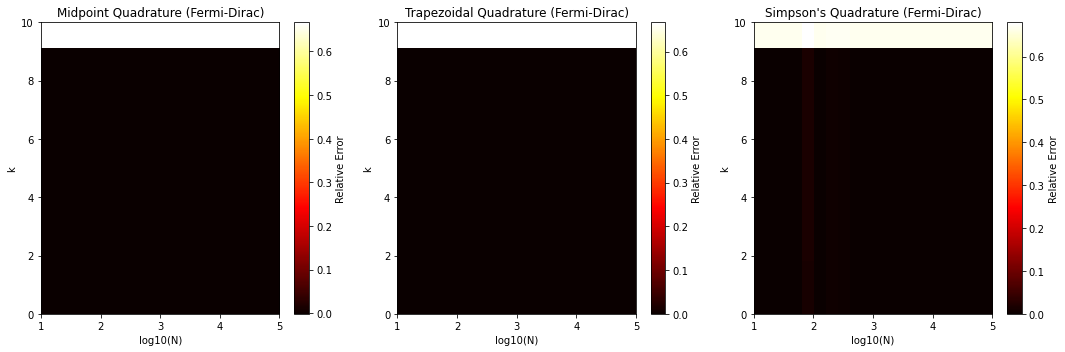

'--------------------Write your code above this line------------------------------'

In [15]:


'''--------------------Write your code below this line------------------------------'''
# Redefine the fermi_dirac_function
def fermi_dirac_function(x, k):
    return 1 / (1 + np.exp(-k * x))

# Recalculate the relative errors for the Fermi-Dirac function using the previously defined Quad_ class
errors_mid_fd = np.zeros((len(k_values_fd), len(N_values_fd)))
errors_trapz_fd = np.zeros_like(errors_mid_fd)
errors_simpson_fd = np.zeros_like(errors_mid_fd)

for i, k in enumerate(k_values_fd):
    I_true_fd = fermi_dirac_integral_true(a, b, k)
    for j, N in enumerate(N_values_fd):
        quad = Quad_(a, b)
        # Midpoint Quadrature
        mid_quad_val_fd = quad.midpoint(lambda x: fermi_dirac_function(x, k), N)
        errors_mid_fd[i, j] = relative_error(I_true_fd, mid_quad_val_fd)

        # Trapezoidal Quadrature
        trapz_quad_val_fd = quad.trapezoidal(lambda x: fermi_dirac_function(x, k), N)
        errors_trapz_fd[i, j] = relative_error(I_true_fd, trapz_quad_val_fd)

        # Simpson's Quadrature
        simpson_quad_val_fd = quad.simpsons(lambda x: fermi_dirac_function(x, k), N)
        errors_simpson_fd[i, j] = relative_error(I_true_fd, simpson_quad_val_fd)

# Plotting the heatmaps for the Fermi-Dirac function
plt.figure(figsize=(15, 5))

# Midpoint Quadrature Heatmap
plt.subplot(1, 3, 1)
plt.imshow(errors_mid_fd, cmap='hot', aspect='auto', extent=[np.log10(N_values_fd[0]), np.log10(N_values_fd[-1]), k_values_fd[0], k_values_fd[-1]])
plt.colorbar(label='Relative Error')
plt.title('Midpoint Quadrature (Fermi-Dirac)')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Trapezoidal Quadrature Heatmap
plt.subplot(1, 3, 2)
plt.imshow(errors_trapz_fd, cmap='hot', aspect='auto', extent=[np.log10(N_values_fd[0]), np.log10(N_values_fd[-1]), k_values_fd[0], k_values_fd[-1]])
plt.colorbar(label='Relative Error')
plt.title('Trapezoidal Quadrature (Fermi-Dirac)')
plt.xlabel('log10(N)')
plt.ylabel('k')

# Simpson's Quadrature Heatmap
plt.subplot(1, 3, 3)
plt.imshow(errors_simpson_fd, cmap='hot', aspect='auto', extent=[np.log10(N_values_fd[0]), np.log10(N_values_fd[-1]), k_values_fd[0], k_values_fd[-1]])
plt.colorbar(label='Relative Error')
plt.title("Simpson's Quadrature (Fermi-Dirac)")
plt.xlabel('log10(N)')
plt.ylabel('k')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [3]:
def V(x):
    return x**4

def time_period(a):
    from scipy.integrate import quad
    from numpy import sqrt

    m = 1  # mass of the particle

    # The integrand function
    def integrand(x):
        return 1/sqrt(V(a) - V(x))

    # Perform the integration from 0 to a
    integral, _ = quad(integrand, 0, a)

    # Calculate the time period
    T = sqrt(8*m) * integral

    return T

amplitude = 1  
time_period(amplitude)



3.708149354603402

## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [5]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
from numpy import sqrt

def time_period_fixed_quad(a, N):
    m = 1  # mass of the particle

    # The integrand function
    def integrand(x):
        return 1/sqrt(V(a) - V(x))

    # Calculate the time period using fixed_quad for N points
    integral_N, _ = fixed_quad(integrand, 0, a, n=N)

    # Calculate the time period using fixed_quad for 2N points
    integral_2N, _ = fixed_quad(integrand, 0, a, n=2*N)

    # Calculate the time period for N and 2N
    T_N = sqrt(8*m) * integral_N
    T_2N = sqrt(8*m) * integral_2N

    # Estimate the error
    error = abs(T_2N - T_N)

    return T_N, T_2N, error

# Initialize variables
a = 2  # amplitude
N = 1  # Start with 1 integration point
error_threshold = 1e-4  # Error threshold
error = float('inf')  # Initialize error

# Increase N until the error is less than the threshold
while error > error_threshold:
    T_N, T_2N, error = time_period_fixed_quad(a, N)
    N *= 2  # Double the number of integration points for the next iteration

# Since we double N in the loop, we divide by 2 to get the N that gives an error just below the threshold
N = N // 2

print(T_N, T_2N, error, N)



'''--------------------Write your code above this line------------------------------'''

1.8539243854218688 1.853999527089495 7.514166762612184e-05 4096


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [16]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
from numpy import sqrt

def time_period_fixed_quad(a, N):
    m = 1  # mass of the particle

    # The integrand function
    def integrand(x):
        return 1/sqrt(V(a) - V(x))

    # Calculate the time period using fixed_quad for N points
    integral_N, _ = fixed_quad(integrand, 0, a, n=N)

    # Calculate the time period using fixed_quad for 2N points
    integral_2N, _ = fixed_quad(integrand, 0, a, n=2*N)

    # Calculate the time period for N and 2N
    T_N = sqrt(8*m) * integral_N
    T_2N = sqrt(8*m) * integral_2N

    # Estimate the error
    error = abs(T_2N - T_N)

    return T_N, T_2N, error

# Initialize variables
a = 2  # amplitude
N = 1  # Start with 1 integration point
error_threshold = 1e-4  # Error threshold
error = float('inf')  # Initialize error

# Increase N until the error is less than the threshold
while error > error_threshold:
    T_N, T_2N, error = time_period_fixed_quad(a, N)
    N *= 2  # Double the number of integration points for the next iteration

# Since we double N in the loop, we divide by 2 to get the N that gives an error just below the threshold
N = N // 2

print(T_N, T_2N, error, N)




'''--------------------Write your code above this line------------------------------'''

1.8539243854218688 1.853999527089495 7.514166762612184e-05 4096


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [14]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import romberg
from numpy import sin, cos

def time_period_romberg(a):
    m = 1  # mass of the particle

    # Change of variable x = a sin(t) to avoid singularity at x = a
    def integrand(t):
        x = a * sin(t)
        # The derivative of x with respect to t
        dx_dt = a * cos(t)
        # To handle the singularity, we avoid division by zero by returning 0 when x = 0 or x = a
        if x == 0 or x == a:
            return 0
        else:
            return dx_dt / sqrt(V(a) - V(x))

    # The limits of integration for t after the change of variable
    t_lower = 0
    t_upper = pi / 2  # since sin(pi/2) = 1, and we want to integrate from 0 to a

    # Perform Romberg integration
    integral = romberg(integrand, t_lower, t_upper, divmax=10)

    # Calculate the time period
    T = sqrt(8*m) * integral

    return T

# Calculate the time period for a = 2 using Romberg integration
T_romberg = time_period_romberg(a=2)
print(T_romberg)




'''--------------------Write your code above this line------------------------------'''

1.85294672745174


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [18]:


'''--------------------Write your code below this line------------------------------'''
def time_period_romberg_show(a, divmax=10, show=False):
    m = 1  # mass of the particle

    # Change of variable x = a sin(t) to avoid singularity at x = a
    def integrand(t):
        x = a * sin(t)
        # The derivative of x with respect to t
        dx_dt = a * cos(t)
        # To handle the singularity, we avoid division by zero by returning 0 when x = 0 or x = a
        if x == 0 or x == a:
            return 0
        else:
            return dx_dt / sqrt(V(a) - V(x))

    # The limits of integration for t after the change of variable
    t_lower = 0
    t_upper = pi / 2  # since sin(pi/2) = 1, and we want to integrate from 0 to a

    # Perform Romberg integration with keyword show=True to display the Romberg integration table
    # The Romberg function returns only the integral value when show=False
    integral = romberg(integrand, t_lower, t_upper, divmax=divmax, show=show, tol=1e-5)

    # Calculate the time period
    T = sqrt(8*m) * integral

    return T

# Calculate the time period for a = 2 using Romberg integration with show=True
T_romberg_show = time_period_romberg_show(a=2, divmax=10, show=True)
T_romberg_show





'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7ff05005ff70> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  0.000000 
     2  0.785398  0.320637  0.427517 
     4  0.392699  0.487920  0.543681  0.551425 
     8  0.196350  0.571717  0.599649  0.603381  0.604205 
    16  0.098175  0.613616  0.627582  0.629444  0.629858  0.629958 
    32  0.049087  0.634565  0.641548  0.642479  0.642686  0.642736  0.642749 
    64  0.024544  0.645040  0.648531  0.648997  0.649100  0.649125  0.649132  0.649133 
   128  0.012272  0.650277  0.652023  0.652256  0.652307  0.652320  0.652323  0.652324  0.652324 
   256  0.006136  0.652896  0.653769  0.653885  0.653911  0.653917  0.653919  0.653919  0.653919  0.653919 
   512  0.003068  0.654205  0.654641  0.654700  0.654713  0.654716  0.654717  0.654717  0.654717  0.654717  0.654717 
  1024  0.001534  0.654860  0.655078  0.655107  0.655114  0.655115  0.655115  0.655116  0.655116  0.655116  0.655116  0.655116 

The fi

'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [19]:


'''--------------------Write your code below this line------------------------------'''
# Calculate the time period for a = 2 using Romberg integration with divmax=15
T_romberg_divmax15 = time_period_romberg_show(a=2, divmax=15, show=True)
T_romberg_divmax15


'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7ff05005fb80> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  0.000000 
     2  0.785398  0.320637  0.427517 
     4  0.392699  0.487920  0.543681  0.551425 
     8  0.196350  0.571717  0.599649  0.603381  0.604205 
    16  0.098175  0.613616  0.627582  0.629444  0.629858  0.629958 
    32  0.049087  0.634565  0.641548  0.642479  0.642686  0.642736  0.642749 
    64  0.024544  0.645040  0.648531  0.648997  0.649100  0.649125  0.649132  0.649133 
   128  0.012272  0.650277  0.652023  0.652256  0.652307  0.652320  0.652323  0.652324  0.652324 
   256  0.006136  0.652896  0.653769  0.653885  0.653911  0.653917  0.653919  0.653919  0.653919  0.653919 
   512  0.003068  0.654205  0.654641  0.654700  0.654713  0.654716  0.654717  0.654717  0.654717  0.654717  0.654717 
  1024  0.001534  0.654860  0.655078  0.655107  0.655114  0.655115  0.655115  0.655116  0.655116  0.655116  0.655116  0.655116 
  2048 

/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.246220e-05
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.233758e-03
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 6.168789e-04
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 4.112526e-04
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 3.084394e-04
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.467515e-04
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/sci

/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.741684e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.682082e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.625016e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.570329e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 2.517873e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/sci

/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.386245e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.370842e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.355778e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.341041e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:960: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.326621e-05
  warnings.warn(
/Users/gechengsheng/opt/anaconda3/lib/python3.8/site-packages/sci

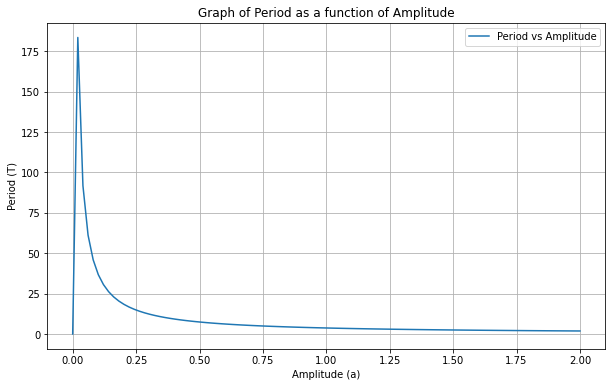

'--------------------Write your code above this line------------------------------'

In [20]:


'''--------------------Write your code below this line------------------------------'''
import matplotlib.pyplot as plt
import numpy as np

# Define the amplitude range from 0 to 2
amplitudes = np.linspace(0, 2, 100)

# Calculate the period for each amplitude
periods = [time_period_romberg_show(a, divmax=15) for a in amplitudes]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(amplitudes, periods, label='Period vs Amplitude')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.title('Graph of Period as a function of Amplitude')
plt.legend()
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [21]:
import numpy as np

# Constants
k = 1.38064852e-23
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)
prefactor = k**4 / c**2 / hb**3 / (4 * pi**2)

stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    # Implement the change of variables
    x = z / (1 - z)
    # The new integrand after the change of variables
    return z**3 / (1 - z)**4 / (np.exp(x) - 1)


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [23]:


'''--------------------Write your code below this line------------------------------'''
pi = np.pi
hb = h / (2 * pi)  # Reduced Planck's constant (J s)

# Prefactor calculation according to the given expression
prefactor = (2 * pi**5 * k**4) / (15 * c**2 * h**3)

# Define the new integrand function after change of variables
def blackbody_integrand(z):
    x = z / (1 - z)
    return (z**3 / (1 - z)**4) / (np.exp(x) - 1)

# Integration using fixed_quad
integral_result, _ = fixed_quad(blackbody_integrand, 0, 1, n=50)

# Stefan-Boltzmann constant calculation
sigma = prefactor * integral_result

print(sigma, prefactor, integral_result)


'''--------------------Write your code above this line------------------------------'''

9.0743795694738e-08 5.6627035034540425e-08 1.6024818470433355


<ipython-input-23-14d6609e72ce>:11: RuntimeWarning: overflow encountered in exp
  return (z**3 / (1 - z)**4) / (np.exp(x) - 1)


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [25]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad

# Constants are already defined in the previous code block

# Define the original integrand function before change of variables
def blackbody_original_integrand(x):
    return x**3 / (np.exp(x) - 1)


integral_result_inf_correct, error_inf_correct = quad(blackbody_original_integrand, 0, np.inf)

sigma_inf_correct = prefactor * integral_result_inf_correct
# Print the result
print("Calculated Stefan-Boltzmann constant using quad with infinite range:")
print(f"σ = {sigma_inf_correct:.8e} W/m^2/K^4")
print(f"Integral result: {integral_result_inf_correct:.8f}")
print(f"Error estimate: {error_inf_correct:.8e}")



'''--------------------Write your code above this line------------------------------'''

Calculated Stefan-Boltzmann constant using quad with infinite range:
σ = 3.67732534e-07 W/m^2/K^4
Integral result: 6.49393940
Error estimate: 2.62847003e-09


<ipython-input-25-74f76d63d541>:8: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


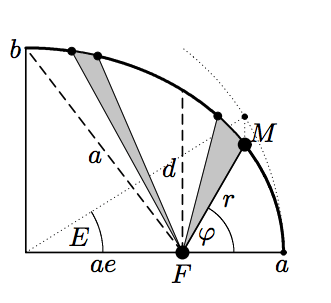


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

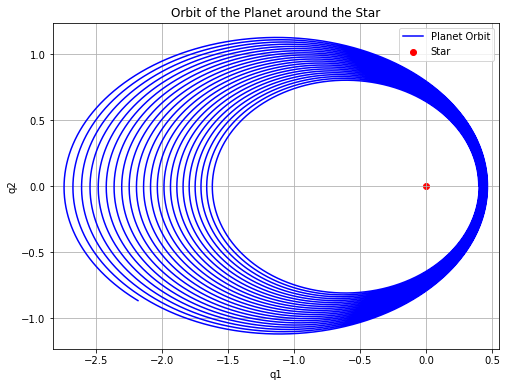

'--------------------Write your code above this line------------------------------'

In [27]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Constants
e = 0.6  # Eccentricity
Tf = 200  # Final time
steps = 400000  # Number of steps
dt = Tf / steps  # Time step

# Initial conditions
q1 = 1 - e
q2 = 0
p1 = 0
p2 = np.sqrt((1 + e) / (1 - e))

# Initialize arrays to store positions and velocities
q1_vals = np.zeros(steps)
q2_vals = np.zeros(steps)
p1_vals = np.zeros(steps)
p2_vals = np.zeros(steps)

q1_vals[0] = q1
q2_vals[0] = q2
p1_vals[0] = p1
p2_vals[0] = p2

# Define the differential equations
def f_q1(p1):
    return p1

def f_q2(p2):
    return p2

def f_p1(q1, q2):
    return -q1 / (q1**2 + q2**2)**(3/2)

def f_p2(q1, q2):
    return -q2 / (q1**2 + q2**2)**(3/2)

# Explicit Euler method to integrate the ODEs
for n in range(steps - 1):
    q1_vals[n + 1] = q1_vals[n] + dt * f_q1(p1_vals[n])
    q2_vals[n + 1] = q2_vals[n] + dt * f_q2(p2_vals[n])
    p1_vals[n + 1] = p1_vals[n] + dt * f_p1(q1_vals[n], q2_vals[n])
    p2_vals[n + 1] = p2_vals[n] + dt * f_p2(q1_vals[n], q2_vals[n])

# Plot the orbit of the planet
plt.figure(figsize=(8, 6))
plt.plot(q1_vals, q2_vals, label='Planet Orbit', color='blue')
plt.scatter([0], [0], color='red', label='Star')
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Orbit of the Planet around the Star')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

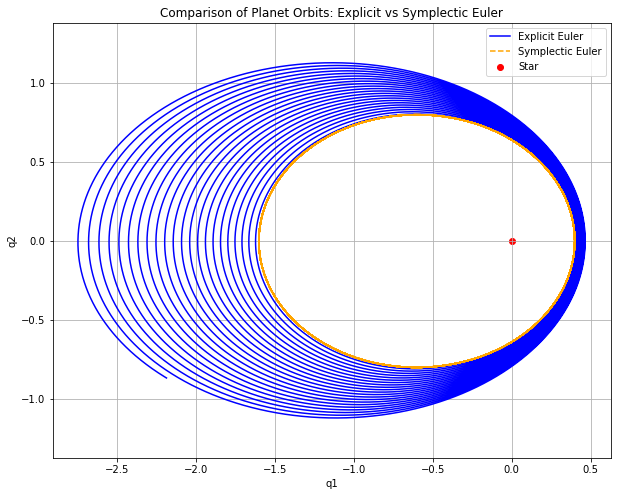

'--------------------Write your code above this line------------------------------'

In [28]:


'''--------------------Write your code below this line------------------------------'''
# Initialize arrays for symplectic Euler method
q1_vals_symp = np.zeros(steps)
q2_vals_symp = np.zeros(steps)
p1_vals_symp = np.zeros(steps)
p2_vals_symp = np.zeros(steps)

q1_vals_symp[0] = q1
q2_vals_symp[0] = q2
p1_vals_symp[0] = p1
p2_vals_symp[0] = p2

# Symplectic Euler method to integrate the ODEs
for n in range(steps - 1):
    # Update momenta
    p1_vals_symp[n + 1] = p1_vals_symp[n] - dt * q1_vals_symp[n] / (q1_vals_symp[n]**2 + q2_vals_symp[n]**2)**(3/2)
    p2_vals_symp[n + 1] = p2_vals_symp[n] - dt * q2_vals_symp[n] / (q1_vals_symp[n]**2 + q2_vals_symp[n]**2)**(3/2)
    # Update positions
    q1_vals_symp[n + 1] = q1_vals_symp[n] + dt * p1_vals_symp[n + 1]
    q2_vals_symp[n + 1] = q2_vals_symp[n] + dt * p2_vals_symp[n + 1]

# Plot the orbits obtained by both methods
plt.figure(figsize=(10, 8))
plt.plot(q1_vals, q2_vals, label='Explicit Euler', color='blue')
plt.plot(q1_vals_symp, q2_vals_symp, label='Symplectic Euler', color='orange', linestyle='--')
plt.scatter([0], [0], color='red', label='Star')
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Comparison of Planet Orbits: Explicit vs Symplectic Euler')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


'''--------------------Write your code above this line------------------------------'''